# Problem Statement and Hypothesis

The dataset used for this project can be found here: https://www.kaggle.com/smid80/canadian-federal-election-results-timeseries. The dataset provides information on the Canadian House of Commons elections, with data from seven previous elections that have occurred within the last 20 years. The problem statement we have is: what factors are good indicators of whether or not a candidate is elected? We have several hypothesis and ideas as to what are good indicators. We believe that candidates' parties, incumbency status, gender, and ballot position are correlated factors with their election results. 



# We start with Visualization #1: A Heatmap of Canadian Provinces and their Political Leanings

In [4]:
#IMPORT STATEMENTS AND READING THE DATA IN
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

candidates_data = pd.read_csv('Candidates.csv')
ridings_data = pd.read_csv('Ridings.csv')
results_data = pd.read_csv('Results.csv')

#Make data labels consistent
for x in range(0, len(candidates_data)):
    if candidates_data['candidate_province_english_anglais'][x] == 'Newfoundland':
        candidates_data['candidate_province_english_anglais'][x] = 'Newfoundland and Labrador'
    elif candidates_data['candidate_province_english_anglais'][x] == 'Yukon Territory':
        candidates_data['candidate_province_english_anglais'][x] = 'Yukon'

#Eliminating all candidates not from the major parties (and thus don't have seats in the house)
Liberal_candidates = pd.DataFrame(candidates_data.loc[(candidates_data['party_abbreviation_english_anglais'] == 'Liberal')])
NDP_candidates = pd.DataFrame(candidates_data.loc[(candidates_data['party_abbreviation_english_anglais'] == 'NDP')])
Green_candidates = pd.DataFrame(candidates_data.loc[(candidates_data['party_abbreviation_english_anglais'] == 'Green')])
Conservative_candidates = pd.DataFrame(candidates_data.loc[(candidates_data['party_abbreviation_english_anglais'] == 'Conservative')])
Bloc_candidates = pd.DataFrame(candidates_data.loc[(candidates_data['party_abbreviation_english_anglais'] == 'Bloc')])
print(Liberal_candidates.party_abbreviation_english_anglais.head(3))

#Relative political leanings of each province from 0-100 relative to the leftest party score (Canada Data Manipulation)
provinces = pd.DataFrame(candidates_data)
provinces = provinces.candidate_province_english_anglais.unique()
provinces = provinces[:-1] #Remove the Nan label
parties = [Liberal_candidates,NDP_candidates,Green_candidates,Conservative_candidates,Bloc_candidates]
party_presence = np.zeros((5,13))
#Political Score is number of elected members of a certain party in a province multiplied by their respective political 
#leanings given by a score obtained from: https://www.politicalcompass.org/canada2019, and normalized.
for party in range(0,len(parties)):
    for cand in range(0, len(parties[party])):
        for prov in range(0, len(provinces)):
            if parties[party].iloc[cand]['candidate_province_english_anglais'] == provinces[prov]:
                party_presence[party][prov] += 1
sums = np.sum(party_presence, axis = 0)
scores = [7.5,1,5,10.5,2]
for i in range(0, 5):
    for j in range(0, 13):
        party_presence[i][j] = party_presence[i][j]/sums[j]
    party_presence[i] *= scores[i]
poli_scores = np.sum(party_presence, axis = 0)
poli_scores -= np.amin(poli_scores)
poli_scores = poli_scores*100/np.amax(poli_scores)
print(poli_scores)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


2    Liberal
5    Liberal
7    Liberal
Name: party_abbreviation_english_anglais, dtype: object
[ 84.0897517   83.66380151  82.41990239  78.33026673  82.02935325
   0.          79.26831461  80.93566833  81.65624242  84.35941881
  83.13341931  72.17237881 100.        ]


Record #9: ['61549', 'CAN', 'Quebec', 'Quebec', 'Quebec', '', 'administrative', '4', 'Q176', 'en:Quebec', '2018-09-08 13:17:34', '', '391115,1428125,0', 'CA-QC']
0                       Alberta
1              British Columbia
2                      Manitoba
3                 New Brunswick
4     Newfoundland and Labrador
5         Northwest Territories
6                   Nova Scotia
7                       Nunavut
8                       Ontario
9          Prince Edward Island
10                       Quebec
11                 Saskatchewan
12                        Yukon
Name: name, dtype: object


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:69: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.


(-80.87188577942783, 48.42535753622233)

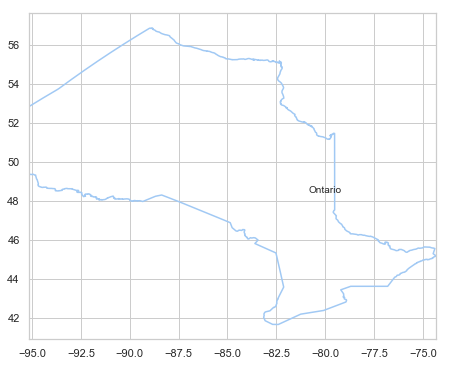

In [5]:
#Map Data can be obtained here: https://www.igismap.com/canada-shapefile-download-free-adminstrative-boundaries-provinces-and-territories/
#Map Data Manipulation
#Pip install (or however else) shapefile and seaborn
import shapefile as shp
import seaborn as sns

sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))
shp_path = './Canada_AL26335/Canada_AL263.shp'
sf = shp.Reader(shp_path)
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    shps = [s.points for s in sf.shapes()]
    #Quebec's data is messed up so I manually entered the records for it
    dat = [sf.record(0)]
    dat.append(sf.record(1))
    dat.append(sf.record(2))
    dat.append(sf.record(3))
    dat.append(sf.record(4))
    dat.append(sf.record(5))
    dat.append(sf.record(6))
    dat.append(sf.record(7))
    dat.append(sf.record(8))
    dat.append(sf.record(9))
    dat.append(sf.record(9))
    dat.append(sf.record(11))
    dat.append(sf.record(12))
    dat[10][0] = '61549'
    dat[10][2] = 'Quebec'
    dat[10][3] = 'Quebec'
    dat[10][4] = 'Quebec'
    dat[10][8] = 'Q176'
    dat[10][9] = 'en:Quebec'
    dat[10][13] = 'CA-QC'
    print(dat[10])
    df = pd.DataFrame(columns=fields, data=dat)
    df = df.assign(coords=shps)
    return df

df = read_shapefile(sf)
print(df.name)

#Plotting 1 Province 
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

province = 'Ontario'
prov_id = df[df.name == province].index.get_values()[0]
plot_shape(prov_id, province)



1: 0 => 77 
2: 78 => 79 
3: 80 => 81 
4: 82 => 82 
5: 83 => 83 
6: 84 => 99 

   1   2   3   4   5   6
Record #9: ['61549', 'CAN', 'Quebec', 'Quebec', 'Quebec', '', 'administrative', '4', 'Q176', 'en:Quebec', '2018-09-08 13:17:34', '', '391115,1428125,0', 'CA-QC']


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:148: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.


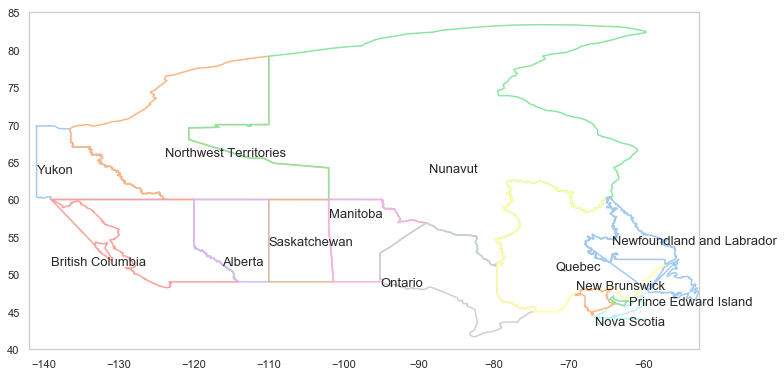

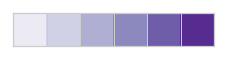

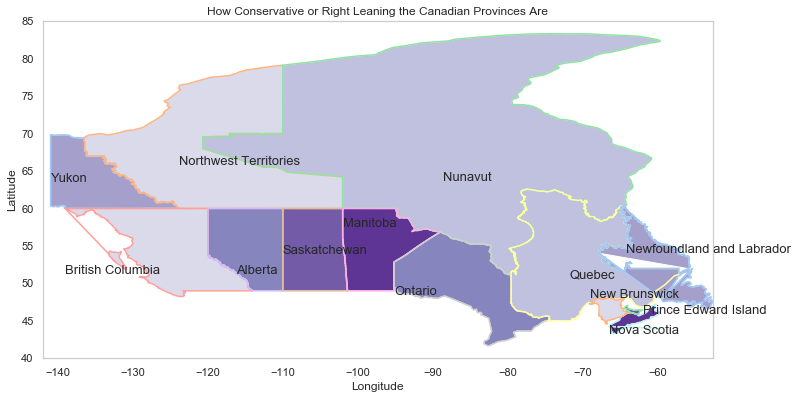

In [6]:
#Plotting all of Canada
def plot_map(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure(figsize = (12,8))
    ax = plt.axes()
    ax.grid(False)
    ax.set_aspect('equal')
    minx = 200
    maxx = -150
    
    for i in range(0, len(id)):
        shape_ex = sf.shape(id[i])
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        plt.plot(x_lon,y_lat)
        #Modifying where the names of each province is placed so they don't block each other
        if s[i] == 'British Columbia':
            x0 = np.min(x_lon)
            y0 = np.mean(y_lat)
        elif s[i] == 'Yukon':
            x0 = np.min(x_lon)
            y0 = np.mean(y_lat)
        elif s[i] == 'Saskatchewan':
            x0 = np.min(x_lon)
            y0 = np.mean(y_lat)
        elif s[i] == 'Manitoba':
            x0 = np.min(x_lon)
            y0 = np.mean(y_lat)
        elif s[i] == 'Ontario':
            x0 = np.min(x_lon)
            y0 = np.mean(y_lat)
        elif s[i] == 'Nova Scotia':
            x0 = np.min(x_lon)
            y0 = np.min(y_lat)
        elif s[i] == 'Prince Edward Island':
            x0 = np.max(x_lon)
            y0 = np.min(y_lat)
        elif s[i] == 'New Brunswick':
            x0 = np.min(x_lon)
            y0 = np.max(y_lat)
        else:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
        plt.text(x0, y0, s[i], fontsize=13)
        # use bbox (bounding box) to set plot limits
        if shape_ex.bbox[0] < minx:
            minx = shape_ex.bbox[0]
        if shape_ex.bbox[2] > maxx:
            maxx = shape_ex.bbox[2]
    plt.xlim(minx-1,maxx)
    plt.ylim(40,85)


#province = 'Quebec'
province = ['Yukon', 'Northwest Territories', 'Nunavut', 'British Columbia', 'Alberta', 'Saskatchewan',
           'Manitoba', 'Ontario', 'Quebec', 'Nova Scotia', 'Newfoundland and Labrador',
           'New Brunswick', 'Prince Edward Island']
#prov_id = df[df.name == province].index.get_values()[0]
prov_id = [12,5,7,1,0,11,2,8,10,6,4,3,9]
plot_map(prov_id, province)
#plot color
def calc_color(data, color=None):
        color_sq = ['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0'] 
        colors = 'Purples'
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;
    
def plot_heat_map(sf, id, title, prov_id,province,printname, color_ton):
#PLOTS A HEAT MAP
    plt.figure(figsize=(12,8))
    ax = plt.axes()
    ax.grid(False)
    ax.set_aspect('equal')
    minx = 200
    maxx = -150
    for i in range(0, len(id)):
        shape_ex = sf.shape(id[i])
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        plt.plot(x_lon,y_lat)
        ax.fill(x_lon,y_lat, color_ton[prov_id.index(i)])
        if printname:
            if province[i] == 'British Columbia':
                x0 = np.min(x_lon)
                y0 = np.mean(y_lat)
            elif province[i] == 'Yukon':
                x0 = np.min(x_lon)
                y0 = np.mean(y_lat)
            elif province[i] == 'Saskatchewan':
                x0 = np.min(x_lon)
                y0 = np.mean(y_lat)
            elif province[i] == 'Manitoba':
                x0 = np.min(x_lon)
                y0 = np.mean(y_lat)
            elif province[i] == 'Ontario':
                x0 = np.min(x_lon)
                y0 = np.mean(y_lat)
            elif province[i] == 'Nova Scotia':
                x0 = np.min(x_lon)
                y0 = np.min(y_lat)
            elif province[i] == 'Prince Edward Island':
                x0 = np.max(x_lon)
                y0 = np.min(y_lat)
            elif province[i] == 'New Brunswick':
                x0 = np.min(x_lon)
                y0 = np.max(y_lat)
            else:
                x0 = np.mean(x_lon)
                y0 = np.mean(y_lat)
            plt.text(x0, y0, province[i], fontsize=13)
        # use bbox (bounding box) to set plot limits
        if shape_ex.bbox[0] < minx:
            minx = shape_ex.bbox[0]
        if shape_ex.bbox[2] > maxx:
            maxx = shape_ex.bbox[2]
    plt.xlim(minx-1,maxx)
    plt.ylim(40,85)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("How Conservative or Right Leaning the Canadian Provinces Are")

def plot_province_data(sf, prov_id,title, provinces, data=None, 
                      color=None):
#    Plot map with provinces and their political data with colors respective to the data

    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    prov = []
    for i in provinces:
        prov.append(df[df.name == i].index.get_values()[0])
    plot_heat_map(sf, prov_id, title, prov,provinces, True, color_ton);

province = ['Yukon', 'Northwest Territories', 'Nunavut', 'British Columbia', 'Alberta', 'Saskatchewan',
           'Manitoba', 'Ontario', 'Quebec', 'Nova Scotia', 'Newfoundland and Labrador',
           'New Brunswick', 'Prince Edward Island']
prov_id = [12,5,7,1,0,11,2,8,10,6,4,3,9]
plot_province_data(sf, prov_id, 'Canada', province, poli_scores, 1)

   The Heatmap shows darker colors representing more conservative values and beliefs with respect to the other areas of Canada. On the whole, we would expect more candidates in general to come from less conservative parties as the majority of Canada does not seem to have deep conservative views. Thus, the more liberal parties should naturally have the tendency to accrue votes and thus candidates running under those parties should be elected more often.

# The next visualization is Visualization #2: Bar Graph of Ballot Sequence Number and Corresponding Win Probabilities

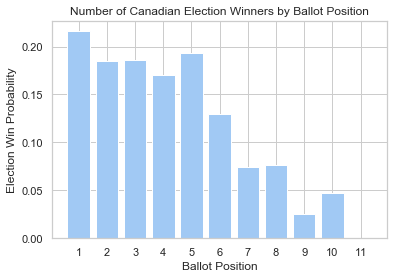

In [7]:
#Imports and reading in Data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Candidates.csv')

#Getting rid of the rows where the dataset stopped recording whether or not the candidate won or didn't win the election 
for x in range (3480, 11779):
    df.drop([x], axis=0, inplace=True)

#Creating variables to store the number of winners from each ballot position
num1winners = 0
num2winners = 0
num3winners = 0
num4winners = 0
num5winners = 0
num6winners = 0
num7winners = 0
num8winners = 0
num9winners = 0
num10winners = 0
num11winners = 0
#Creating variables to store the total number of candidates from each ballot position
num1 = 0
num2 = 0
num3 = 0
num4 = 0
num5 = 0
num6 = 0
num7 = 0
num8 = 0
num9 = 0
num10 = 0
num11 = 0

#Iterating through the data to count the total number of candidates from each ballot position
#and the number of candidates who won from each ballot position
for x in range(0, 3480):
    if (df['ballot_sequence_number'][x] == 1):
        num1 = num1+1
        if (df['elected_indicator'][x] == 'Y'):
            num1winners = num1winners+1
    if (df['ballot_sequence_number'][x] == 2):
        num2 = num2+1
        if (df['elected_indicator'][x] == 'Y'):
            num2winners = num2winners+1
    if (df['ballot_sequence_number'][x] == 3):
        num3 = num3+1
        if (df['elected_indicator'][x] == 'Y'):
            num3winners = num3winners+1
    if (df['ballot_sequence_number'][x] == 4):
        num4 = num4+1
        if (df['elected_indicator'][x] == 'Y'):
            num4winners = num4winners+1
    if (df['ballot_sequence_number'][x] == 5):
        num5 = num5+1
        if (df['elected_indicator'][x] == 'Y'):
            num5winners = num5winners+1
    if (df['ballot_sequence_number'][x] == 6):
        num6 = num6+1
        if (df['elected_indicator'][x] == 'Y'):
            num6winners = num6winners+1
    if (df['ballot_sequence_number'][x] == 7):
        num7 = num7+1
        if (df['elected_indicator'][x] == 'Y'):
            num7winners = num7winners+1
    if (df['ballot_sequence_number'][x] == 8):
        num8 = num8+1
        if (df['elected_indicator'][x] == 'Y'):
            num8winners = num8winners+1
    if (df['ballot_sequence_number'][x] == 9):
        num9 = num9+1
        if (df['elected_indicator'][x] == 'Y'):
            num9winners = num9winners+1
    if (df['ballot_sequence_number'][x] == 10):
        num10 = num10+1
        if (df['elected_indicator'][x] == 'Y'):
            num10winners = num10winners+1
    if (df['ballot_sequence_number'][x] == 11):
        num11 = num11+1
        if (df['elected_indicator'][x] == 'Y'):
            num11winners = num11winners+1

#Creating the list of ballot positions
ballot_position = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

#Creating the list of win probabilities, which is calculated for each position as the 
#number of winners from that position over the total number of candidates who had that ballot position
winprobabilities = [num1winners/num1, num2winners/num2, num3winners/num3, num4winners/num4, 
                    num5winners/num5, num6winners/num6, num7winners/num7, num8winners/num8, 
                    num9winners/num9, num10winners/num10, num11winners/num11]

#Creating and displaying the bar graph
plt.bar(ballot_position, winprobabilities)
plt.title('Number of Canadian Election Winners by Ballot Position')
plt.xlabel('Ballot Position')
plt.ylabel('Election Win Probability')
plt.show()

The bar graph is a visualization showing the probability that a candidate from a certain ballot position would win their election for each ballot position. Over the data being analyzed, the ballot positions ranged from 1 to 11, inclusive. To clarify, this doesn’t mean that each election had 11 people running, but rather that in at least one of the elections, there were 11 people running. Thus, there was someone with the 11th ballot position in those elections. With this data, we counted the number of times a candidate had a certain ballot position as well as the number of times each time a candidate from a certain ballot position won an election. Due to the fact that the data stops detailing whether an election was won or not after row 3482 in the Excel spreadsheet, the for loop only iterates through the rows that do contain that piece of information. Then, for each ballot position, we evaluated the number of times a certain ballot position won divided by the number of times that ballot position showed up to determine each ballot position’s “win probability.” These win probabilities were then plotted in a bar graph to show the corresponding win probability for each ballot position. While the bar graph does show a general decrease in win probability as the ballot position number goes up, which would support the idea that a lower number ballot position gives a higher chance of electoral success due to some voters who vote without much knowledge of the candidates themselves, this graph could be a little misleading and a result of correlation and not causation. This is because of the fact that higher ballot positions appearing in an election means that there are more candidates running in that election, so the win probability is inherently expected to be lower. For example, the only times a ballot position of 10 would appear would be when there are 10 or more candidates running, which means that the probability that a candidate in position 10 wins over the scope of the entire data set is expected to be relatively low. 

# The first model is a K Nearest Neighbor Model: How Good of a Feature is a Candidate's Occupation?

Accuracy Score: 0.8318965517241379


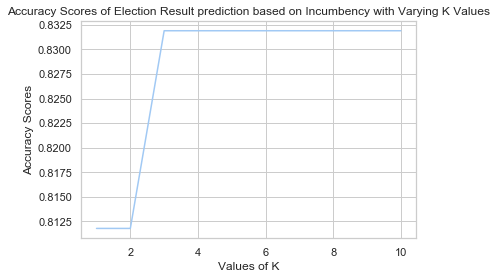

In [8]:
#Import Statements
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Candidates.csv')

#Getting rid of the rows where the dataset stopped recording whether or not the candidate won or didn't win the election 
for x in range (3480, 11779):
    df.drop([x], axis=0, inplace=True)

#Replacing a person's occupation with a 1 if they are a politician and a 0 if they are not
for a in range (0, 3480):
    if (df['candidate_occupation_english_anglais'][a] == 'Politician'):
        df['candidate_occupation_english_anglais'].replace('Politician', 1, inplace=True)
    else:
        String = df['candidate_occupation_english_anglais'][a]
        if (String != 1):
            df['candidate_occupation_english_anglais'].replace(String, 0, inplace=True)

#Creating and fitting the model
x_train, x_test, y_train, y_test = train_test_split(df[['candidate_occupation_english_anglais']], df['elected_indicator'], test_size = .2, random_state = 42)
model = KNeighborsClassifier()
model.fit(x_train, y_train)

#Getting the accuracy score of the model
predictions = model.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, predictions))

#Determining which values of k give the highest accuracy scores
accuracies = []
for k in range (1, 11):
    model2 = KNeighborsClassifier(k)
    model2.fit(x_train, y_train)
    predictions2 = model2.predict(x_test)
    accuracies.append(accuracy_score(y_test, predictions2))
plt.xlabel("Values of K")
plt.ylabel("Accuracy Scores")
plt.title("Accuracy Scores of Election Result prediction based on Incumbency with Varying K Values")
plt.plot(np.arange(1,11, 1), accuracies)

The KNN model analyzes the occupation of a candidate and their electoral success. In order to make this possible and more of a streamlined process, we had to modify the data by changing the values in the occupation column to 0s and 1s, where 0 represents someone whose occupation is not a politician and 1 is someone who is a politician. Another modification we had to make was cutting off the rows of data after and including row 3482 in the Excel spreadsheet because the dataset did not provide in the election indicator column whether or not the candidate was actually elected. After making the necessary modifications, we then created the model and determined its accuracy score. The accuracy score for the default k value of 5 was about .83, and in order to determine what the best value for k would be, we used  a for loop in order to make a model with different k values (from 1 to 10 inclusive) and then plot those results in a graph. The graph shows that k values of 3 and higher are all the optimal k values. The relatively high score for k values of 3 and above shows that there is a pretty strong connection between being a politician and electoral success. 


# The second model is a Perceptron: Which Features are Good Indicators of Election Results?

In [9]:
#IMPORT STATEMENTS AND READING THE DATA IN
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

candidates = pd.read_csv('Candidates.csv')

#Data Cleansing/Manipulation
party_list = candidates['party_abbreviation_english_anglais'].unique()
num_candidates = len(candidates)
for i in range(0, num_candidates):
    if candidates['candidate_gender_code'][i] != 'M' and candidates['candidate_gender_code'][i] != 'F':
        candidates.drop([i], axis=0, inplace=True)

party_nums = np.arange(1, 36, 1)

#Separating the Training and Testing Data

X = np.empty((4, len(candidates)))
Y = np.empty(len(candidates))
for i in range(0, len(candidates)):
    #Enter different factors and see how they correspond with election indicators
    X[0][i] = ord(candidates['candidate_gender_code'][i])
    X[1][i] = ord(candidates['incumbent_indicator'][i])
    X[3][i] = candidates['ballot_sequence_number'][i]
    for j in range(0, len(party_list)):
        if candidates['party_abbreviation_english_anglais'][i] == party_list[j]:
            X[2][i] = party_nums[j]
            break
    Y[i] = ord(candidates['elected_indicator'][i])
#Split test and training data
ratio = int(len(Y)*4/5)
train_x = X[0:4:1,:ratio:1]
test_x = X[0:4:1,ratio:len(X[0]):1]
train_y = Y[:ratio]
test_y = Y[ratio:]

In [11]:
#Model Creation and Test
gender_model = Perceptron()
gender_model.fit(train_x[0].reshape(-1,1), train_y)

Perc_train = gender_model.predict(train_x[0].reshape(-1,1))
Perc_test = gender_model.predict(test_x[0].reshape(-1,1))
print("Gender Training accuracy: ", accuracy_score(train_y, Perc_train))
print("Gender Testing accuracy: ", accuracy_score(test_y, Perc_test))

incumbent_model = Perceptron()
incumbent_model.fit(train_x[1].reshape(-1,1), train_y)

Perc_train = incumbent_model.predict(train_x[1].reshape(-1,1))
Perc_test = incumbent_model.predict(test_x[1].reshape(-1,1))
print("Incumbent Training accuracy: ", accuracy_score(train_y, Perc_train))
print("Incumbent Testing accuracy: ", accuracy_score(test_y, Perc_test))

party_model = Perceptron()
party_model.fit(train_x[2].reshape(-1,1), train_y)
Perc_train = party_model.predict(train_x[2].reshape(-1,1))
Perc_test = party_model.predict(test_x[2].reshape(-1,1))
print("Party Training accuracy: ", accuracy_score(train_y, Perc_train))
print("Party Testing accuracy: ", accuracy_score(test_y, Perc_test))

ballnum_model = Perceptron()
ballnum_model.fit(train_x[3].reshape(-1,1), train_y)
Perc_train = party_model.predict(train_x[3].reshape(-1,1))
Perc_test = party_model.predict(test_x[3].reshape(-1,1))
print("Ballot Sequence Training accuracy: ", accuracy_score(train_y, Perc_train))
print("Ballot Sequence Testing accuracy: ", accuracy_score(test_y, Perc_test))

overall_model = Perceptron()
overall_model.fit(np.transpose(train_x), train_y)

Perc_train = overall_model.predict(np.transpose(train_x))
Perc_test = overall_model.predict(np.transpose(test_x))
print("Overall Training accuracy: ", accuracy_score(train_y, Perc_train))
print("Overall Testing accuracy: ", accuracy_score(test_y, Perc_test))

Gender Training accuracy:  0.17313218390804597
Gender Testing accuracy:  0.1724137931034483
Incumbent Training accuracy:  0.9375
Incumbent Testing accuracy:  0.9540229885057471
Party Training accuracy:  0.826867816091954
Party Testing accuracy:  0.8275862068965517
Ballot Sequence Training accuracy:  0.826867816091954
Ballot Sequence Testing accuracy:  0.8275862068965517
Overall Training accuracy:  0.8494971264367817
Overall Testing accuracy:  0.8505747126436781


   The Perceptron takes each feature in our hypothesis and determines their individual worth as an indicator for election results. We then take the features and cumulatively combine them to determine an overall indicator for the election results. As you can see, the gender code is harmful towards the overall accuracy with its own worth being virtually useless in helping predict election results. Incumbent status, Ballot Sequence Number, and the Party of the candidate are far better features that predict the election results. Furthermore, we can see that the Perceptron's prediction using incumbency status is better than that of the KNN in the previous model by over 10 percentage points. The overall score results indicate that the gender code confuses the model and thus worsens the accuracy in comparison to the model of the sole feature of incumbency. Furthermore, the Party score and Ballot Sequence score were the exact same, showing that the Canadian election must have some ordering method that correlates the two, resulting in the same accuracy score as they probably indicated in the same pattern.